In [111]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import urllib3
import re


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [177]:
CLIENT_ID = 'WXNUH2PMIPGTENRW1DBJDNR0YB4PZSG3VKW3EFFMB435QANG' # your Foursquare ID
CLIENT_SECRET = 'QOYE5DSL3FUZDI5ZZI0BGJVJF4BUOVXEDPVKAI5CUNXIPBNA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WXNUH2PMIPGTENRW1DBJDNR0YB4PZSG3VKW3EFFMB435QANG
CLIENT_SECRET:QOYE5DSL3FUZDI5ZZI0BGJVJF4BUOVXEDPVKAI5CUNXIPBNA


# Capstone Project - The Battle of Neighborhoods (Week 1)

## Background
jakarta

## Data
https://en.wikipedia.org/wiki/Jakarta#Administration
https://en.wikipedia.org/wiki/South_Jakarta#Subdistricts
https://en.wikipedia.org/wiki/East_Jakarta#Subdistricts
https://en.wikipedia.org/wiki/East_Jakarta#Subdistricts
https://en.wikipedia.org/wiki/Central_Jakarta#Subdistricts
https://en.wikipedia.org/wiki/West_Jakarta#Subdistricts
https://en.wikipedia.org/wiki/North_Jakarta#Subdistricts
https://en.wikipedia.org/wiki/Thousand_Islands_(Indonesia)#Islands_and_administrative_divisions

In [6]:
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
	'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
	'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
	'Accept-Encoding': 'none',
	'Accept-Language': 'en-US,en;q=0.8',
	'Connection': 'keep-alive'}

def FetchHtml(url):
    http = urllib3.PoolManager()
    fRequest = http.request('GET', url, headers=hdr)
    return fRequest.data

In [54]:
url_paris = 'https://en.wikipedia.org/wiki/Arrondissements_of_Paris'
soup_paris = BeautifulSoup(FetchHtml(url_paris))

g:\developments\notebooks-3.0\env\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [64]:
arrondissements = soup_paris.find('table', {'class':'wikitable'}).find('tbody').find_all('tr')[1:]

In [113]:
df_arrondissements = pd.DataFrame(columns=['arrondissement', 'name', 'population', 'density'])
for arrondissement_data in arrondissements:
    tds = arrondissement_data.find_all('td')
    arrondissement = {
        'arrondissement': tds[0].text,
        'name': tds[1].text,
        'area': tds[2].text,
        'population': tds[4].text,
        'density': tds[5].text
    }
    df_arrondissements = df_arrondissements.append(arrondissement, ignore_index=True)


In [114]:
df_arrondissements['population'] = df_arrondissements.apply(lambda x: pd.to_numeric(x.population.replace(',','')), axis=1)
df_arrondissements['density'] = df_arrondissements.apply(lambda x: pd.to_numeric(x.density.replace(',',''),errors='coerce'), axis=1)
df_arrondissements['area'] = df_arrondissements.area.map(lambda x: pd.to_numeric(re.search(r"^([\d\.]+)", x)[0].replace(',','')))

In [115]:
df_arrondissements

,arrondissement,name,population,density,area
0,1st (Ie) R,Louvre,17700,9693.0,1.826
1,2nd (IIe) R,Bourse,20700,20867.0,0.992
2,3rd (IIIe) R,Temple,35100,29974.0,1.171
3,4th (IVe) R,Hôtel-de-Ville,28600,17864.0,1.601
4,5th (Ve) L,Panthéon,60600,23849.0,2.541
5,6th (VIe) L,Luxembourg,45200,20984.0,2.154
6,7th (VIIe) L,Palais-Bourbon,55400,13552.0,4.088
7,8th (VIIIe) R,Élysée,38700,9972.0,3.881
8,9th (IXe) R,Opéra,58500,26847.0,2.179
9,10th (Xe) R,Entrepôt,88800,30705.0,2.892


In [134]:
df_arrondissements['density'] = df_arrondissements.apply(lambda x: x.density if not np.isnan(x.density) else x.population/x.area, axis=1)

In [135]:
df_arrondissements

,arrondissement,name,population,density,area
0,1st (Ie) R,Louvre,17700,9693.000000,1.826
1,2nd (IIe) R,Bourse,20700,20867.000000,0.992
2,3rd (IIIe) R,Temple,35100,29974.000000,1.171
3,4th (IVe) R,Hôtel-de-Ville,28600,17864.000000,1.601
4,5th (Ve) L,Panthéon,60600,23849.000000,2.541
5,6th (VIe) L,Luxembourg,45200,20984.000000,2.154
6,7th (VIIe) L,Palais-Bourbon,55400,13552.000000,4.088
7,8th (VIIIe) R,Élysée,38700,9972.000000,3.881
8,9th (IXe) R,Opéra,58500,26847.000000,2.179
9,10th (Xe) R,Entrepôt,88800,30705.000000,2.892


In [140]:
df_arrondissements.sort_values('population')

,arrondissement,name,population,density,area
0,1st (Ie) R,Louvre,17700,9693.000000,1.826
1,2nd (IIe) R,Bourse,20700,20867.000000,0.992
3,4th (IVe) R,Hôtel-de-Ville,28600,17864.000000,1.601
2,3rd (IIIe) R,Temple,35100,29974.000000,1.171
7,8th (VIIIe) R,Élysée,38700,9972.000000,3.881
5,6th (VIe) L,Luxembourg,45200,20984.000000,2.154
6,7th (VIIe) L,Palais-Bourbon,55400,13552.000000,4.088
8,9th (IXe) R,Opéra,58500,26847.000000,2.179
4,5th (Ve) L,Panthéon,60600,23849.000000,2.541
9,10th (Xe) R,Entrepôt,88800,30705.000000,2.892


In [157]:
df_arrondissements.describe()

,population,density,area
count,20.000000,20.000000,20.000000
mean,108300.000000,22977.757738,5.266650
std,69847.834612,9090.018723,4.354362
min,17700.000000,8472.188189,0.992000
25%,43575.000000,16786.000000,2.172750
50%,111750.000000,24667.500000,3.984500
75%,165550.000000,28701.250000,6.200250
max,232400.000000,41598.000000,16.324000


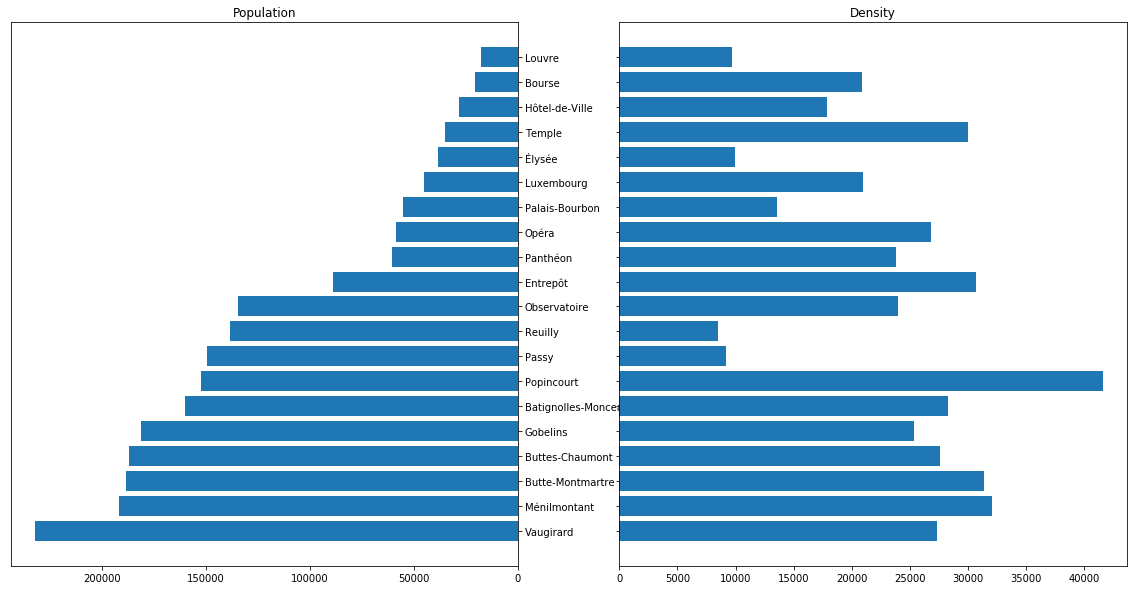

In [176]:
df_arrondissements_sort_population = df_arrondissements.sort_values('population', ascending=False)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

ax[0].barh(df_arrondissements_sort_population.name, df_arrondissements_sort_population.population)
ax[0].set_title('Population')
ax[0].yaxis.tick_right()
ax[0].invert_xaxis()

ax[1].barh(df_arrondissements_sort_population.name, df_arrondissements_sort_population.density)
ax[1].set_title('Density')
plt.show()